In [88]:
import os
import re
import math
import nltk
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, roc_curve, jaccard_similarity_score, precision_score
%matplotlib inline

Dataset obtained from: https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html <br>
This data set is a collection of 20,000 messages, collected from 20 different netnews newsgroups. One thousand messages from each of the twenty newsgroups were chosen at random and partitioned by newsgroup name.

In [89]:
rootdir = '/Users/aadi/Documents/DATA620/hw05/data/'

In [90]:
df_ = pd.DataFrame(index=range(0), columns=['class', 'document'])
df_ = df_.fillna(0) # with 0s rather than NaNs

In [91]:
df_

Empty DataFrame
Columns: [class, document]
Index: []

In [92]:
counter = 0
for subdir, dirs, files in os.walk(rootdir):
    folder_name = os.path.basename(subdir)
    for file in files:
        if not file.startswith('.'):
            f = open(subdir+'/'+file, 'r')
            txt = f.read()
            header_end = re.search(r'\n\n', txt)
            pos = header_end.start()
            strlen = len(txt)
            txt = txt[pos:strlen]
            df_ = df_.append({'class':folder_name, 'document':txt}, ignore_index=True)
            counter = counter + 1
            if counter % 500 == 0:
                print counter

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500


In [93]:
df_['document'] = df_['document'].str.replace('\n', '')

In [94]:
df_

class                                           document
0             alt.atheism  Archive-name: atheism/resourcesAlt-atheism-arc...
1             alt.atheism  Archive-name: atheism/introductionAlt-atheism-...
2             alt.atheism  In article <65974@mimsy.umd.edu>mangoe@cs.umd....
3             alt.atheism  dmn@kepler.unh.edu (...until kings become phil...
4             alt.atheism  In article <N4HY.93Apr5120934@harder.ccr-p.ida...
5             alt.atheism  In article <1993Apr5.091139.823@batman.bmd.trw...
6             alt.atheism  arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) ...
7             alt.atheism  In article <114127@bu.edu>jaeger@buphy.bu.edu ...
8             alt.atheism  (reference line trimmed)livesey@solntze.wpd.sg...
9             alt.atheism  kmr4@po.CWRU.edu (Keith M. Ryan) writes:>>Then...
10            alt.atheism  livesey@solntze.wpd.sgi.com (Jon Livesey) writ...
11            alt.atheism  sandvik@newton.apple.com (Kent Sandvik) writes...
12            alt.atheism  wpr@atlanta.dg.com (Bill Rawlins) writes:>>[.....
13            alt.atheism  arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee) ...
14            alt.atheism  bobbe@vice.ICO.TEK.COM (Robert Beauchaine) wri...
15            alt.atheism  bobbe@vice.ICO.TEK.COM (Robert Beauchaine) wri...
16            alt.atheism  bobbe@vice.ICO.TEK.COM (Robert Beauchaine) wri...
17            alt.atheism  In article <2942881697.0.p00168@psilink.com> p...
18            alt.atheism  In article <1993Apr3.081052.11292@monu6.cc.mon...
19            alt.atheism  In article <1993Apr3.212139.14076@blaze.cs.jhu...
20            alt.atheism  In article <1phnkoINNbk@ctron-news.ctron.com> ...
21            alt.atheism  Someone writes:>I found a list of Biblical con...
22            alt.atheism  In article <16BA1E927.DRPORTER@SUVM.SYR.EDU>, ...
23            alt.atheism  In article <j0=5l3=@rpi.edu>, johnsd2@jec322.i...
24            alt.atheism  In article <930405.172903.4w6.rusnews.w165w@ma...
25            alt.atheism  livesey@solntze.wpd.sgi.com (Jon Livesey) writ...
26            alt.atheism  livesey@solntze.wpd.sgi.com (Jon Livesey) writ...
27            alt.atheism  In article <199304041750.AA17104@kepler.unh.ed...
28            alt.atheism  In article <C4rzz2.47J@unix.portal.com> danb@s...
29            alt.atheism  In article <1993Apr3.214741.14026@ultb.isc.rit...
...                   ...                                                ...
19967  talk.religion.misc  In article <1993Apr26.150845.28537@advtech.usw...
19968  talk.religion.misc       The following partial summary of a Theory...
19969  talk.religion.misc  In article <1993Apr23.163823.24226@ads.com> wm...
19970  talk.religion.misc  Jeremiah:25:27 Therefore thou shalt say unto t...
19971  talk.religion.misc  In article <1f2P02UA40zB01@JUTS.ccc.amdahl.com...
19972  talk.religion.misc  In article <lefty-260493134641@lefty.apple.com...
19973  talk.religion.misc  netd@susie.sbc.com () writes:> In article <20A...
19974  talk.religion.misc  In article <1993Apr26.215627.24917@organpipe.u...
19975  talk.religion.misc       I wasn't sure if this was the right newsg...
19976  talk.religion.misc  >I'm curious to know if Christians ever read b...
19977  talk.religion.misc  In article <26APR199315363120@rigel.tamu.edu> ...
19978  talk.religion.misc  king@ctron.com (John E. King) writes:>scharle@...
19979  talk.religion.misc  I am pleased to announce that a *revised versi...
19980  talk.religion.misc  In article <C5vGyD.H7s@acsu.buffalo.edu> psyro...
19981  talk.religion.misc  Mark McCullough (mccullou@snake2.cs.wisc.edu) ...
19982  talk.religion.misc  In article <1r7os6$hil@agate.berkeley.edu> isa...
19983  talk.religion.misc  In article <1rc9vg$9be@squick.eitech.com> ekr@...
19984  talk.religion.misc  In article <1993Apr26.163627.11364@csrd.uiuc.e...
19985  talk.religion.misc  In article <1993Apr15.012537.26867@nntpd2.cxo....
19986  talk.religion.misc  On 26-Apr-93 in Re: What part of "No" don't..u...
19987  talk.reli

In [95]:
data1 = df_
shuffled_indices = np.random.permutation(np.arange(len(data1)))
data1 = data1.reset_index(drop=True)
train_proportion = 0.8

shuffled_df = data1.reindex(np.random.permutation(data1.index))
shuffled_df = shuffled_df.reset_index(drop=True)
df_train = shuffled_df[0:int(math.floor(train_proportion*len(shuffled_df)))]
df_test = shuffled_df[int(math.floor(train_proportion*len(shuffled_df))+1):len(shuffled_df)]
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()    
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    words = letters_only.lower().split()                             
    stops = set(nltk.corpus.stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [96]:
def perf_measure(y_actual, y_hat, metric=[]):
    TN, TP, FN, TP = confusion_matrix(y_actual, y_hat).ravel()

    if metric == 'sensitivity':
        return TP/(TP+FP)
    elif metric == 'specificity':
        return TN/(TN+FN)
    else:
        return(TP, FP, TN, FN)

In [97]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [98]:
num_paths_train = df_train["document"].size
num_paths_test = df_test["document"].size
#print num_paths_test
clean_paths_train = []
clean_paths_test = []

for i in xrange(0, num_paths_train):
    clean_paths_train.append(review_to_words(df_train["document"][i]))

for i in xrange(0, num_paths_test):
    clean_paths_test.append(review_to_words(df_test["document"][i]))


In [99]:
collapsed_train = ' '.join(clean_paths_train)
print 'vectorizing'
vectorizer = CountVectorizer(analyzer = "word",ngram_range=(1,6),tokenizer = None,preprocessor = None,stop_words = None, max_features=10000) 
print 'transforming'
train_data_features = vectorizer.fit_transform(clean_paths_train)
print 'transforming complete'
train_data_features = train_data_features.toarray()
vocab = vectorizer.get_feature_names()
dist = np.sum(train_data_features, axis=0)
for tag, count in zip(vocab, dist):
    print count, tag

vectorizing
transforming
transforming complete
123 aa
60 aaa
107 aaron
199 ab
41 abandoned
125 abc
73 abiding
336 ability
1322 able
44 able find
89 able get
41 able use
343 abortion
71 abortions
58 aboutthe
48 abraham
61 abs
68 absence
298 absolute
44 absolute truth
320 absolutely
67 absolutes
71 abstract
112 absurd
44 abu
200 abuse
39 abused
41 abuses
890 ac
42 ac il
50 ac nz
403 ac uk
47 ac za
69 acad
44 acad alaska
43 acad alaska edu
39 acad alaska edu high
83 academic
45 acc
56 accelerated
60 acceleration
92 accelerator
43 accelerators
592 accept
184 acceptable
71 acceptance
255 accepted
62 accepting
46 accepts
951 access
128 access digex
104 access digex com
45 access digex com pat
41 access digex com pat writes
151 accident
60 accidental
79 accidents
64 accomplish
58 accomplished
59 accord
641 according
352 account
135 accounts
148 accuracy
40 accuracy information
39 accuracy information errors
39 accuracy information errors omissions
39 accuracy information errors omissions exce

In [100]:
from operator import itemgetter
f = zip(vocab, dist)
sorted(f,key=itemgetter(1), reverse=True)

[(u'ax', 30962),
 (u'ax ax', 27931),
 (u'ax ax ax', 25119),
 (u'ax ax ax ax', 22450),
 (u'ax ax ax ax ax', 19926),
 (u'ax ax ax ax ax ax', 17567),
 (u'would', 11830),
 (u'one', 11816),
 (u'writes', 11687),
 (u'edu', 11522),
 (u'article', 9972),
 (u'com', 7753),
 (u'like', 7747),
 (u'people', 7545),
 (u'know', 6930),
 (u'get', 6441),
 (u'think', 6050),
 (u'also', 5675),
 (u'time', 5286),
 (u'use', 5019),
 (u'could', 4606),
 (u'well', 4511),
 (u'good', 4488),
 (u'new', 4371),
 (u'may', 4223),
 (u'even', 4216),
 (u'see', 4160),
 (u'way', 4060),
 (u'us', 3946),
 (u'god', 3918),
 (u'make', 3843),
 (u'two', 3829),
 (u'much', 3758),
 (u'right', 3756),
 (u'many', 3744),
 (u'say', 3739),
 (u'first', 3729),
 (u'want', 3392),
 (u'said', 3371),
 (u'system', 3316),
 (u'anyone', 3312),
 (u'go', 3150),
 (u'used', 3092),
 (u'work', 2962),
 (u'need', 2901),
 (u'really', 2861),
 (u'something', 2833),
 (u'since', 2776),
 (u'believe', 2746),
 (u'please', 2684),
 (u'problem', 2672),
 (u'still', 2645),
 (u'

In [101]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, df_train["class"] )
print 'Training complete'

Training the random forest...
Training complete


In [102]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_paths_test)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

In [103]:
accuracy_score(df_test['class'], result)

0.74518629657414348

In [104]:
cohen_kappa_score(df_test['class'], result)

0.73173542577604689

In [105]:
jaccard_similarity_score(df_test['class'], result)

0.74518629657414348

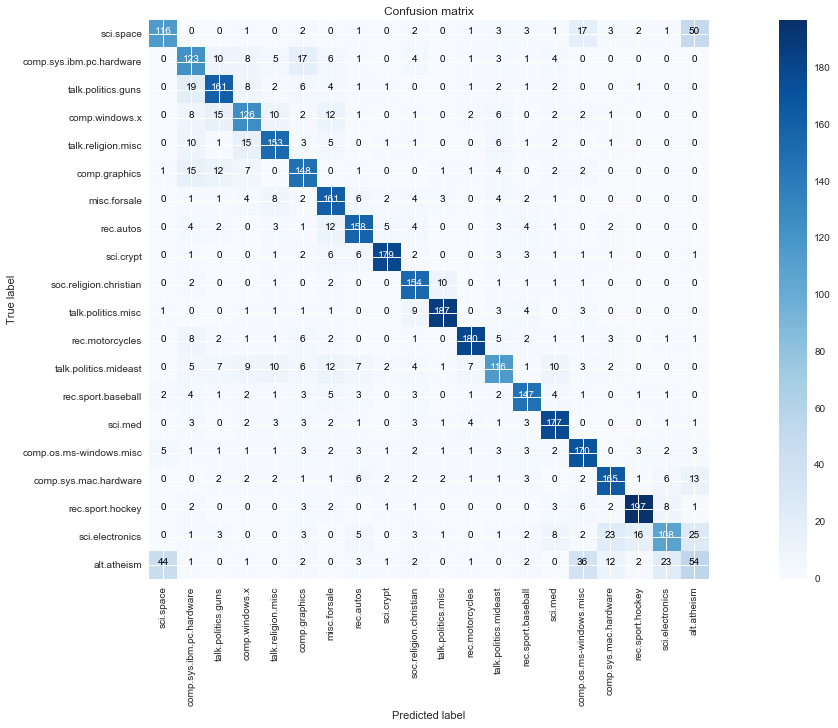

In [106]:
def plot_confusion_matrix(classes, cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cmatrix = confusion_matrix(df_test['class'], result)
plt.figure(figsize=(20,10))
plot_confusion_matrix(df_train['class'].unique(),cmatrix)
plt.show()